In [22]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import config as C
import plotly.express as px
from features.UserJoin import UserJoin

pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_columns = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
ds = UserJoin()

In [39]:
test_ids = pd.read_csv('submit_3_3_1.csv')
test_ids = test_ids[test_ids.label == 1].id.values
# print((month[['p_f', 'p_g', 'f_g']] < 0).sum().values)
# print((day[['2_3', '2_4', '3_4']]<0).sum().values)

def norm_arr(s, n=2):
    return s[((s < (s.mean() + n*s.std())) & (s > (s.mean() - n*s.std())))]

def state(df):
    nowids = set(df.index.unique().values)
    testids = set(test_ids)
    print('in testids not in now ids', len(testids - nowids))
    return df.groupby('label').count().iloc[:, [0]]

def checkids(origin, df):
    nowids = set(df.index.unique().values)
    testids = set(test_ids)
    print('before ids len', len(origin.index.unique().values))
    print('now ids len', len(nowids))
    print('test ids len', len(testids))

    print('in testids not in now ids', len(testids - nowids))
    return df.groupby('label').count().iloc[:, [0]]

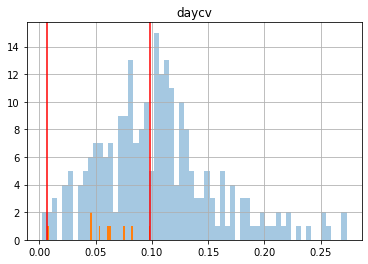

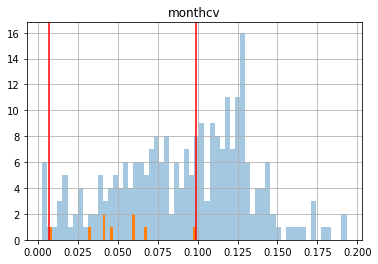

In [46]:
def check_f(s, df=ds.train2):
    norm_arr(df[s]).hist(bins=60, alpha=.4)

    s2 = df[df.index.isin(C.minerids)][s]
    s2.hist(bins=60)

    plt.axvline(x=s2.min(), c='r')
    plt.axvline(x=s2.max(), c='r')
    plt.title(s)
    plt.show()


for i in ds.train2.columns:
    if 'cv' not in i:
        continue
    try:
        check_f(i)
    except:
        continue